In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#from sklearn.
from basis_expansions import NaturalCubicSpline

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
concrete = pd.read_excel('Concrete_Data.xls')

In [9]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [11]:
column_names_raw = concrete.columns
print(column_names_raw)

Index([u'Cement (component 1)(kg in a m^3 mixture)',
       u'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       u'Fly Ash (component 3)(kg in a m^3 mixture)',
       u'Water  (component 4)(kg in a m^3 mixture)',
       u'Superplasticizer (component 5)(kg in a m^3 mixture)',
       u'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       u'Fine Aggregate (component 7)(kg in a m^3 mixture)', u'Age (day)',
       u'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [39]:
column_names = [
    'cement',
    'blast_furnace_slag',
    'fly_ash',
    'water',
    'superplasticizer',
    'coarse_aggregate',
    'finite_aggregate',
    'age',
    'compressive_strength',
]
concrete.columns = column_names

In [40]:
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,finite_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## EDA

In [47]:
def make_natural_cubic_regression(x_lim, n_knots):
    return Pipeline([
        ('standardizer', StandardScalar()),
        ('nat_cubic', NaturalCubicSpline(x_lim[0], x_lim[1], n_knots=n_knots)),
        ('regression', LinearRegression(fit_intercept=True))
    ])

In [48]:
ncr = make_natural_cubic_regression((100, 600), 10)
_ = ncr.fit(concrete['cement'], concrete['compressive_strength'])

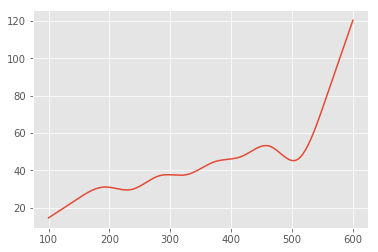

In [49]:
t = np.linspace(100, 600, num=250)
y_smoothed = ncr.predict(t.reshape(-1, 1))

fig, ax = 

plt.plot(t, y_smoothed)

In [60]:
def plot_univariate_smooth(ax, x, y, smooth=True, n_knots=10, x_lim=None):
    if not x_lim:
        x_lim = (np.min(x), np.max(x))
    ax.scatter(x, y, color='grey', alpha=0.25)
    
    if smooth:
        ncr = make_natural_cubic_regression((100, 600), 10)
        ncr.fit(x, y)
        t = np.linspace(x_lim[0], x_lim[1], num=250)
        y_smoothed = ncr.predict(t.reshape(-1, 1))
        ax.plot(t, y_smoothed)

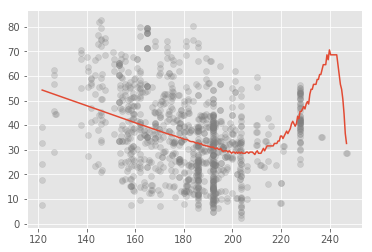

In [61]:
fig, ax = plt.subplots()
plot_univariate_smooth(ax, concrete['water'], concrete['compressive_strength'])